In [5]:
import geopandas as gpd
import pandas as pd

df = pd.read_json('city_list.min.json')

In [15]:
df['geometry'] ='POINT(' + df['latitude'].map(str) + ', ' + df['longitude'].map(str) + ')'

In [16]:
df['geometry']

0           POINT(34.16033, -116.04771)
1           POINT(38.19502, -121.23326)
2            POINT(34.4892, -118.19722)
3           POINT(35.63693, -120.69406)
4           POINT(34.59142, -117.47669)
5           POINT(41.20108, -120.93801)
6            POINT(34.9531, -117.90254)
7           POINT(34.14452, -118.76038)
8              POINT(34.1364, -118.775)
9               POINT(34.446, -118.517)
10          POINT(33.42571, -116.80163)
11          POINT(37.38323, -119.71946)
12           POINT(37.76361, -122.2582)
13           POINT(37.85277, -122.0197)
14          POINT(37.88952, -122.29365)
15          POINT(39.21108, -123.70585)
16             POINT(40.1763, -123.612)
17          POINT(34.07361, -118.14483)
18          POINT(33.57612, -117.73638)
19             POINT(39.4696, -120.843)
20          POINT(35.95949, -119.45591)
21             POINT(32.8438, -116.759)
22                POINT(39.15, -120.15)
23          POINT(39.21378, -120.79994)
24          POINT(34.15554, -117.58974)


In [18]:
gdf = gpd.GeoDataFrame(df)

In [68]:
gdf[gdf['city'] == 'Glen Cove']

SBF  SBM  SD  SM       city    region                   geometry
7948  110   28  41   6  Glen Cove  New York  POINT (-73.62591 40.8649)

In [72]:
cities = ['Minneapolis', 'Nova Scotia', 'Sacramento', 'Glen Cove', 'Bucaramanga', 'Lima', 'Hooper', 'Orlando', 'Bakersfield', 'New York', 'Barnstable', 'Barranquilla', 'Lafayette', 'London', 'Dublin', 'Charlotte', 'Nilai', 'Beverly Hills', 'Los Angeles', 'Santiago De Los Caballeros', 'Los Angeles', 'New York', 'Spartanburg', 'Culver City', 'Halton Hills', 'Las Vegas', 'San Francisco', 'Arizona', 'Suisun City']
gdf[gdf['city'].isin(cities)].to_csv('cities.csv')

In [24]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
df = df.drop(['longitude', 'latitude'], axis=1)
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(df, crs=crs, geometry=geometry)

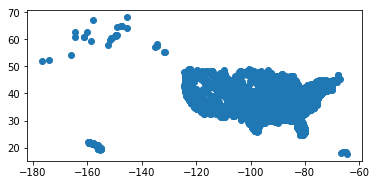

In [25]:
gdf.plot()

C:\Users\Mathieu Lemay\Anaconda3\envs\ztdl\lib\site-packages\geopandas\plotting.py:389: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs.
For a sequence of values to be color-mapped, use the 'c' kwarg instead.

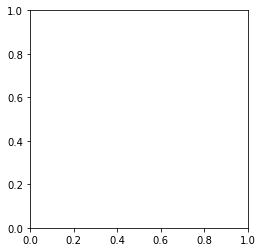

In [33]:
import mplleaflet
ax = gdf[0:30].plot(column='SBF', color='SBF')
mplleaflet.display(fig=ax.figure, crs=gdf.crs)

In [34]:
usstates = gpd.read_file('us-states.json')

In [35]:
import mplleaflet
ax = usstates.plot()
mplleaflet.display(fig=ax.figure, crs=gdf.crs)

In [40]:
newdf = df.groupby('region').mean()

In [41]:
newdf

SBF         SBM           SD         SM
region                                                               
Alabama                 79.857143   16.465201    17.542125   2.886447
Alaska                  62.193548   13.709677    17.483871   2.548387
Arizona                410.169643   96.303571    91.580357   8.651786
Arkansas                76.633094   15.625899    13.467626   1.928058
California             383.274376   83.405896   100.102041   6.365079
Colorado               198.012739   42.847134    42.426752   3.687898
Connecticut             97.639344   24.158470    23.256831   2.486339
Delaware                93.018868   21.113208    19.339623   2.679245
District Of Columbia  3967.333333  932.000000  1009.666667  88.666667
Florida                305.571429   67.681185    58.353659   6.987805
Georgia                314.319559   52.820937    52.487603   5.451791
Hawaii                  80.051724   23.206897    25.879310   1.827586
Idaho                   76.344828   16.741379    15.310345   1.310345
Illinois               199.153846   35.414201    45.278107   3.435897
Indiana                112.391941   22.721612    19.494505   2.358974
Iowa                    74.176991   16.681416    15.221239   1.778761
Kansas                 104.078261   22.600000    23.582609   2.330435
Kentucky                85.157895   17.157895    13.714912   2.087719
Louisiana              120.563452   25.563452    25.629442   2.807107
Maine                   35.505882    8.623529     8.470588   0.658824
Maryland               137.846715   28.171533    23.642336   3.116788
Massachusetts          111.297521   29.768595    43.727273   2.209366
Michigan               125.110312   26.865707    24.446043   2.573141
Minnesota              119.280612   24.954082    24.367347   2.198980
Mississippi             72.856164   12.719178    10.294521   2.171233
Missouri               121.808594   23.390625    22.902344   2.640625
Montana                 70.531250   15.593750    15.500000   0.875000
Nebraska               144.068182   30.795455    28.363636   2.659091
Nevada                1203.875000  164.375000   217.687500  14.645833
New Hampshire           49.872093   11.209302    12.755814   0.697674
New Jersey              86.507194   23.149281    22.561151   2.330935
New Mexico             142.489362   35.382979    28.085106   2.446809
New York               403.570461   85.043360    82.078591   7.174797
North Carolina         132.317460   26.154195    21.934240   2.911565
North Dakota            66.160000   14.840000    18.000000   1.440000
Ohio                   121.151874   25.272189    22.514793   2.700197
Oklahoma               135.885135   28.878378    24.891892   2.837838
Oregon                 183.487805   40.406504    34.772358   2.308943
Other                   10.500000    1.500000     5.000000   0.500000
Pennsylvania           107.123119   20.499316    18.254446   1.949384
Puerto Rico              7.333333    3.666667     2.000000   1.666667
Rhode Island           113.407407   28.222222    20.796296   2.148148
South Carolina         111.640777   21.490291    19.480583   2.582524
South Dakota            65.500000   12.961538    13.230769   1.153846
Tennessee              138.413655   26.028112    25.457831   3.176707
Texas                  335.006211   62.987578    80.520186   6.208075
Utah                   113.838095   25.914286    25.942857   2.961905
Vermont                 32.255814    7.744186     8.232558   0.558140
Virgin Islands          16.500000    4.000000     4.500000   0.000000
Virginia               140.231270   31.644951    33.400651   3.889251
Washington             187.543269   42.798077    43.615385   3.211538
Washington, Dc        4046.000000  890.000000  1069.000000  43.000000
West Virginia           52.303371   11.752809     8.831461   1.359551
Wisconsin              103.731481   21.842593    18.388889   2.388889
Wyoming                 37.428571    8.535714     8.464286   1.250000

In [64]:

us = usstates.merge(newdf, left_on='name', right_index=True) 

In [66]:
us = us[us['name'] != 'Alaska']

In [67]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,1,figsize=(15,15))
ax = us.plot(column='SBF', colormap='winter', ax=ax)
mplleaflet.display(fig=ax.figure, crs=gdf.crs)

C:\Users\Mathieu Lemay\Anaconda3\envs\ztdl\lib\site-packages\geopandas\plotting.py:381: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


id                  name    density  \
0   01               Alabama     94.650   
1   02                Alaska      1.264   
2   04               Arizona     57.050   
3   05              Arkansas     56.430   
4   06            California    241.700   
5   08              Colorado     49.330   
6   09           Connecticut    739.100   
7   10              Delaware    464.300   
8   11  District of Columbia  10065.000   
9   12               Florida    353.400   
10  13               Georgia    169.500   
11  15                Hawaii    214.100   
12  16                 Idaho     19.150   
13  17              Illinois    231.500   
14  18               Indiana    181.700   
15  19                  Iowa     54.810   
16  20                Kansas     35.090   
17  21              Kentucky    110.000   
18  22             Louisiana    105.000   
19  23                 Maine     43.040   
20  24              Maryland    596.300   
21  25         Massachusetts    840.200   
22  26              Michigan    173.900   
23  27             Minnesota     67.140   
24  28           Mississippi     63.500   
25  29              Missouri     87.260   
26  30               Montana      6.858   
27  31              Nebraska     23.970   
28  32                Nevada     24.800   
29  33         New Hampshire    147.000   
30  34            New Jersey   1189.000   
31  35            New Mexico     17.160   
32  36              New York    412.300   
33  37        North Carolina    198.200   
34  38          North Dakota      9.916   
35  39                  Ohio    281.900   
36  40              Oklahoma     55.220   
37  41                Oregon     40.330   
38  42          Pennsylvania    284.300   
39  44          Rhode Island   1006.000   
40  45        South Carolina    155.400   
41  46          South Dakota     98.070   
42  47             Tennessee     88.080   
43  48                 Texas     98.070   
44  49                  Utah     34.300   
45  50               Vermont     67.730   
46  51              Virginia    204.500   
47  53            Washington    102.600   
48  54         West Virginia     77.060   
49  55             Wisconsin    105.200   
50  56               Wyoming      5.851   
51  72           Puerto Rico   1082.000   

                                             geometry  
0   POLYGON ((-87.359296 35.00118, -85.606675 34.9...  
1   (POLYGON ((-131.602021 55.117982, -131.569159 ...  
2   POLYGON ((-109.042503 37.000263, -109.04798 31...  
3   POLYGON ((-94.473842 36.501861, -90.152536 36....  
4   POLYGON ((-123.233256 42.006186, -122.378853 4...  
5   POLYGON ((-107.919731 41.003906, -105.728954 4...  
6   POLYGON ((-73.053528 42.039048, -71.7993089999...  
7   POLYGON ((-75.414089 39.804456, -75.5071970000...  
8   POLYGON ((-77.035264 38.993869, -76.909294 38....  
9   POLYGON ((-85.497137 30.997536, -85.004212 31....  
10  POLYGON ((-83.109191 35.00118, -83.322791 34.7...  
11  (POLYGON ((-155.634835 18.948267, -155.881297 ...  
12  POLYGON ((-116.04751 49.000239, -116.04751 47....  
13  POLYGON ((-90.639984 42.510065, -88.7887779999...  
14  POLYGON ((-85.990061 41.759724, -84.807042 41....  
15  POLYGON ((-91.36841699999999 43.501391, -91.21...  
16  POLYGON ((-101.90605 40.001626, -95.306337 40....  
17  POLYGON ((-83.903347 38.769315, -83.678792 38....  
18  POLYGON ((-93.608485 33.018527, -91.1657699999...  
19  POLYGON ((-70.70392099999999 43.057759, -70.82...  
20  (POLYGON ((-75.99464500000001 37.95325, -76.01...  
21  POLYGON ((-70.91752099999999 42.887974, -70.81...  
22  (POLYGON ((-83.454238 41.732339, -84.807042 41...  
23  POLYGON ((-92.014696 46.705401, -92.091373 46....  
24  POLYGON ((-88.471115 34.995703, -88.2027449999...  
25  POLYGON ((-91.833957 40.609566, -91.729895 40....  
26  POLYGON ((-104.047534 49.000239, -104.042057 4...  
27  POLYGON ((-103.324578 43.002989, -101.626726 4...  
28  POLYGON ((-117.027882 42.000709, -114.04295 41...  
29  POLYGON ((-71.08183 45.303304, -71.03253

In [74]:
newdf[['name', 'density']]

KeyError: "['name' 'density'] not in index"